In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load dataset (Uploaded Yelp dataset)
file_path = "/Users/sandeepundurthi/Desktop/yelp/yelp.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# Convert stars into binary sentiment
# 1-2 stars -> Negative (0), 4-5 stars -> Positive (1), Drop 3-star reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

In [6]:
# Ensure NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_resources()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandeepundurthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)


In [8]:
# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

In [18]:
# Check if column is successfully created
print("Dataset preview after preprocessing:")
print(df[['text', 'clean_text', 'sentiment']].head())

Dataset preview after preprocessing:
                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...   
4  General Manager Scott Petello is a good egg!!!...   

                                          clean_text  sentiment  
0  wife took birthday breakfast excellent weather...          1  
1  idea people give bad review place go show plea...          1  
2  love gyro plate rice good also dig candy selec...          1  
3  rosie dakota love chaparral dog park convenien...          1  
4  general manager scott petello good egg go deta...          1  


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)


In [22]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [24]:
# Train Naïve Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [28]:
# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8220140515222483

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.13      0.23       348
           1       0.82      1.00      0.90      1360

    accuracy                           0.82      1708
   macro avg       0.90      0.56      0.56      1708
weighted avg       0.85      0.82      0.76      1708



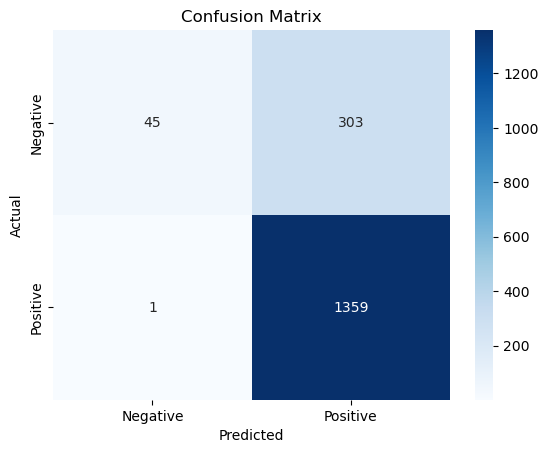

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Save Model and Vectorizer for Deployment
import joblib
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']